In [1]:
# https://matplotlib.org/stable/api/markers_api.html

In [15]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import bootstrap

In [3]:
# Load the data from the uploaded CSV file
file_path = './CN_coefficients.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data.head()

,AoA,M1.0_CN-ALPHA,M0.6_CN-ALPHA,M4.63_CN-ALPHA,M2.3_CN-ALPHA,M1.5_CN-ALPHA
0,-8.0,NaN,NaN,NaN,NaN,NaN
1,-7.9,NaN,NaN,NaN,NaN,NaN
2,-7.8,NaN,NaN,NaN,NaN,NaN
3,-7.7,NaN,NaN,NaN,NaN,NaN
4,-7.6,NaN,NaN,NaN,NaN,NaN


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


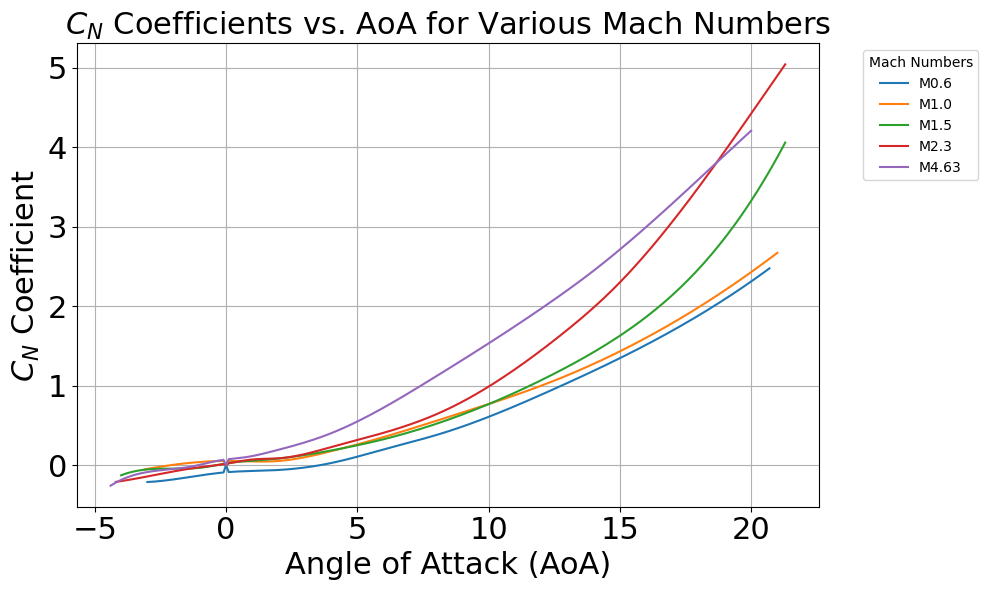

In [4]:
# Extract the Mach number from each column name and sort the columns by Mach number
# Create a list of tuples (mach_number, column_name), sort by mach_number
sorted_columns = sorted([(float(col.split('_')[0][1:]), col) for col in data.columns[1:]])

# Set up the plot
plt.figure(figsize=(10, 6))

# Loop through the sorted Mach number columns
for mach, column in sorted_columns:
    # Extract the AoA and corresponding CN values, removing NaNs
    aoa = data['AoA']
    cn_values = data[column]
    
    # Plot only if there are valid data points
    if cn_values.notna().any():
        plt.plot(aoa, cn_values, label=f"M{mach}")

# Increase tick label font size
plt.tick_params(axis='both', which='major', labelsize=22)  # Major ticks
plt.tick_params(axis='both', which='minor', labelsize=22)  # Minor ticks

# Add labels and title
plt.xlabel('Angle of Attack (AoA)', fontsize=22)
plt.ylabel('$C_N$ Coefficient', fontsize=22)
plt.title('$C_N$ Coefficients vs. AoA for Various Mach Numbers', fontsize=22)
plt.grid(True)
plt.legend(title='Mach Numbers', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better viewing
plt.tight_layout()

plt.savefig("CN_vs_alpha.png")
plt.savefig("CN_vs_alpha.eps")
plt.savefig("CN_vs_alpha.pdf")

plt.show()

### $C_N$ coefficient for $\alpha$ = 0$^\circ$ as function of Mach number.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


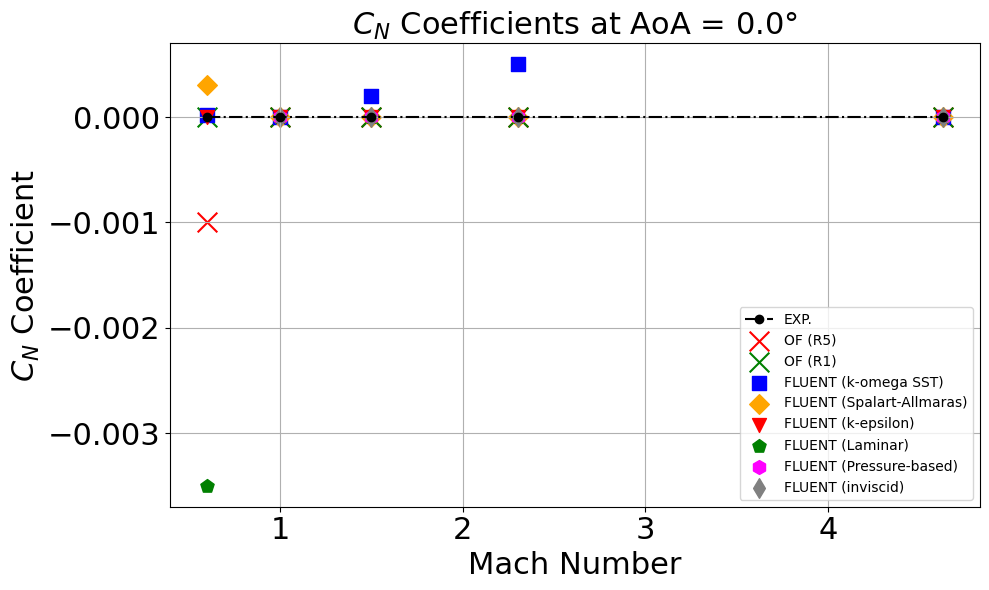

In [5]:
# OpenFOAM results
OF_data = {
    0.6:  [-0.001, 0.000], # Corresponds to R5 and R1
    1.0:  [0.000, 0.000],  
    1.5:  [0.000, 0.000], 
    2.3:  [0.000, 0.000],  
    4.63: [0.000, 0.000]   
}

OF_mach_numbers = list(OF_data.keys())
CN_values_R5 = [values[0] for values in OF_data.values()]  
CN_values_R1 = [values[1] for values in OF_data.values()]  

# Fluent results for different turbulence models (example data)
FLUENT_data_models = {
    'k-omega SST': {
        0.6:  [0.0000188, 0.0000188], # Corresponds to R5 and R1 (at the moment only R1 available)
        1.0:  [0.0001,0.0000],
        1.5:  [0.0002,0.0002],
        2.3:  [0.0005,0.0005],
        4.63: [0.0,0.0]
    },
    'Spalart-Allmaras': {
        0.6:  [0.0003, 0.0003],
        1.0:  [0.0,0.0],
        1.5:  [0.0,0.0],
        2.3:  [0.0,0.0],
        4.63: [0.0,0.0]
    },
    'k-epsilon': {
        0.6:  [0.000, 0.000],
        1.0:  [0.0,0.0],
        1.5:  [0.0,0.0],
        2.3:  [0.0,0.0],
        4.63: [0.0,0.0]
    },
    'Laminar': {
        0.6:  [-0.0035, -0.0035],
        1.0:  [0.0,0.0],
        1.5:  [0.0,0.0],
        2.3:  [0.0,0.0],
        4.63: [0.0,0.0]
    },
    'Pressure-based': {
        #0.6:  [-0.0223, -0.0223],
        1.0:  [0.0,0.0],
        1.5:  [0.0,0.0],
        2.3:  [0.0,0.0],
        4.63: [0.0,0.0]
 },
    'inviscid': {
        #0.6: [0.00208, 0.00208],
        1.0: [0.0,0.0],
        1.5: [0.0,0.0],
        2.3: [0.0,0.0],
        4.63: [0.0,0.0]
    }
}

# Extract the unique AoA values, skipping NaNs
unique_aoa = data['AoA'].dropna().unique()

# Select a specific AoA value for demonstration (e.g., index 80)
selected_aoa_values = unique_aoa[80:81]

# Iterate over the selected AoA values and plot for each
for aoa_value in selected_aoa_values:
    # Extract the CN values for the specific AoA across all Mach numbers
    cn_values = data[data['AoA'] == aoa_value].iloc[0, 1:]  # Select the row for the AoA and skip the 'AoA' column
    
    # Extract the Mach numbers from column names and convert them to floats
    mach_numbers = [float(re.findall(r"[-+]?\d*\.?\d+", col)[0]) for col in data.columns[1:]]
    cn_values = cn_values.values
    
    # Sort the Mach numbers and the corresponding C_A values
    sorted_indices = np.argsort(mach_numbers)
    mach_numbers = np.array(mach_numbers)[sorted_indices]
    cn_values = cn_values[sorted_indices]
    
    # Plot EXPERIMENTAL results
    plt.figure(figsize=(10, 6))
    plt.plot(mach_numbers, cn_values, marker='o', linestyle='-.', color='k', label='EXP.')

    # Plotting OPENFOAM results
    plt.scatter(OF_mach_numbers, CN_values_R5, marker='x', s=200, label='OF (R5)', color='red')
    plt.scatter(OF_mach_numbers, CN_values_R1, marker='x', s=200, label='OF (R1)', color='green')
    
    # Plotting FLUENT results
    markers = ['s', 'D', 'v', 'p', 'h', "d"]  # Different markers for each model
    colors = ['blue', 'orange', 'red', 'green', 'magenta', 'grey']  # Different colors for each model
    for (model_name, model_data), marker, color in zip(FLUENT_data_models.items(), markers, colors):
        mach_numbers_model = list(model_data.keys())
        cn_values_R1_model = [values[1] for values in model_data.values()]
        
        # Plotting the R1 values for simplicity (adjust as needed)
        plt.scatter(mach_numbers_model, cn_values_R1_model, marker=marker, s=100, label=f'FLUENT ({model_name})', color=color)
        
        # Calculate the error with respect to experimental values
        error_band = [abs(cn_values[np.argwhere(mach_numbers == mach)[0][0]] - model_value)
                      for mach, model_value in zip(mach_numbers_model, cn_values_R1_model)]
        
        # Adding error bands
        #plt.errorbar(mach_numbers_model, cn_values_R1_model, yerr=error_band, fmt='none', ecolor=color, elinewidth=1.5, capsize=3)
    
    # Increase tick label font size
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.tick_params(axis='both', which='minor', labelsize=22)
    
    plt.xlabel('Mach Number', fontsize=22)
    plt.ylabel('$C_N$ Coefficient', fontsize=22)
    plt.title(f'$C_N$ Coefficients at AoA = {aoa_value}°', fontsize=22)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.savefig(f"CN_alpha_{aoa_value}.png")
    plt.savefig(f"CN_alpha_{aoa_value}.eps")
    plt.savefig(f"CN_alpha_{aoa_value}.pdf")    
    plt.show()

### $C_N$ coefficient for $\alpha$ = 8$^\circ$ as function of Mach number.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


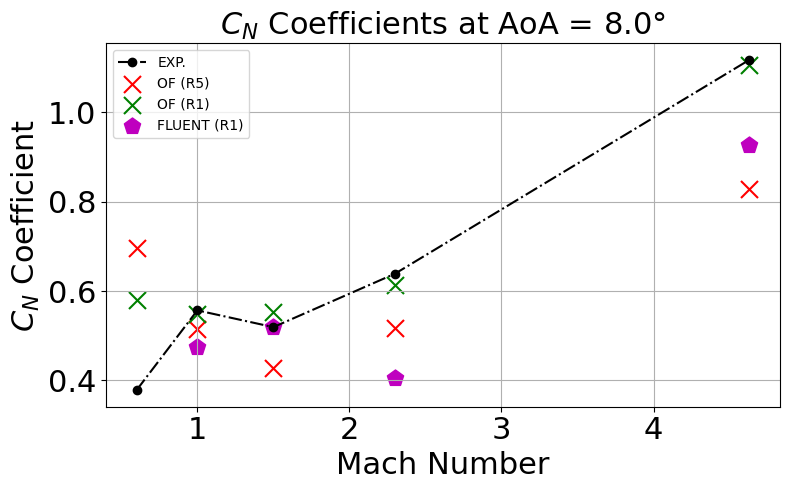

In [6]:
### OpenFOAM results ###
########################
# Data for Mach numbers and corresponding CN values for AoA = 8
OF_data = {
    0.6: [0.696, 0.579],  # Corresponds to R5 and R1
    1.0: [0.516, 0.548],  # Corresponds to R5 and R1
    1.5: [0.429, 0.553],  # Corresponds to R5 and R1
    2.3: [0.517, 0.614],  # Corresponds to R5 and R1
    4.63: [0.829, 1.106]  # Corresponds to R5 and R1
}

# Extracting Mach numbers and corresponding CN values
OF_mach_numbers = list(OF_data.keys())
CN_values_R5 = [values[0] for values in OF_data.values()]  # Select R5 values
CN_values_R1 = [values[1] for values in OF_data.values()]  # Select R1 values

### Fluent results ###
######################
# Data for Mach numbers and corresponding CN values for AoA = 8
FLUENT_data = {
    #0.6: [0.272, 0.373],  # Corresponds to R5 and R1
    1.0: [0.4752, 0.4752], # Corresponds to R5 and R1
    1.5: [0.5186, 0.5186], # Corresponds to R5 and R1
    2.3: [0.4058, 0.4058], # Corresponds to R5 and R1
    4.63: [0.9259, 0.9259] # Corresponds to R5 and R1
}

# Extracting Mach numbers and corresponding CN values
FLUENT_mach_numbers = list(FLUENT_data.keys())
CN_values_R5_FLUENT = [values[0] for values in FLUENT_data.values()]  # Select R5 values
CN_values_R1_FLUENT = [values[1] for values in FLUENT_data.values()]  # Select R1 values

# Extract the unique AoA values, skipping NaNs
unique_aoa = data['AoA'].dropna().unique()

# Select a specific AoA value for demonstration (e.g., index 80)
selected_aoa_values = unique_aoa[160:161]

# Iterate over the selected AoA values and plot for each
for aoa_value in selected_aoa_values:
    # Extract the CN values for the specific AoA across all Mach numbers
    cn_values = data[data['AoA'] == aoa_value].iloc[0, 1:]  # Select the row for the AoA and skip the 'AoA' column
    
    # Extract the Mach numbers from column names and convert them to floats
    mach_numbers = [float(re.findall(r"[-+]?\d*\.?\d+", col)[0]) for col in data.columns[1:]]
    cn_values = cn_values.values
    
    # Sort the Mach numbers and the corresponding C_A values
    sorted_indices = np.argsort(mach_numbers)
    mach_numbers = np.array(mach_numbers)[sorted_indices]
    cn_values = cn_values[sorted_indices]
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(mach_numbers, cn_values, marker='o', linestyle='-.', color='k', label='EXP.')

    # Plotting OF results
    #plt.plot(OF_mach_numbers, CN_values_R5, marker='o', label='OF (R5)', color='red')
    #plt.plot(OF_mach_numbers, CN_values_R1, marker='o', label='OF (R1)', color='green')
    plt.scatter(OF_mach_numbers, CN_values_R5, marker='x', s=150, label='OF (R5)', color='red')
    plt.scatter(OF_mach_numbers, CN_values_R1, marker='x', s=150, label='OF (R1)', color='green')
    
    # Plotting FLUENT results
    #plt.plot(FLUENT_mach_numbers, Cn_values_R5_FLUENT, marker='X', label='FLUENT (R5)', color='k')
    #plt.plot(FLUENT_mach_numbers, CN_values_R1_FLUENT, marker='X', label='FLUENT (R1)', color='m')
    #plt.scatter(FLUENT_mach_numbers, CN_values_R5_FLUENT, marker='X', label='FLUENT (R5)', color='b')
    plt.scatter(FLUENT_mach_numbers, CN_values_R1_FLUENT, marker='p', s=150, label='FLUENT (R1)', color='m')

    # Increase tick label font size
    plt.tick_params(axis='both', which='major', labelsize=22)  # Major ticks
    plt.tick_params(axis='both', which='minor', labelsize=22)  # Minor ticks
    
    plt.xlabel('Mach Number', fontsize=22)
    plt.ylabel(r'$C_N$ Coefficient', fontsize=22)
    plt.title(f'$C_N$ Coefficients at AoA = {aoa_value}°', fontsize=22)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.savefig("CN_alpha8.png")
    plt.savefig("CN_alpha8.eps")
    plt.savefig("CN_alpha8.pdf")         
    plt.show()

### $C_N$ coefficient for $\alpha$ = 16$^\circ$ as function of Mach number.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


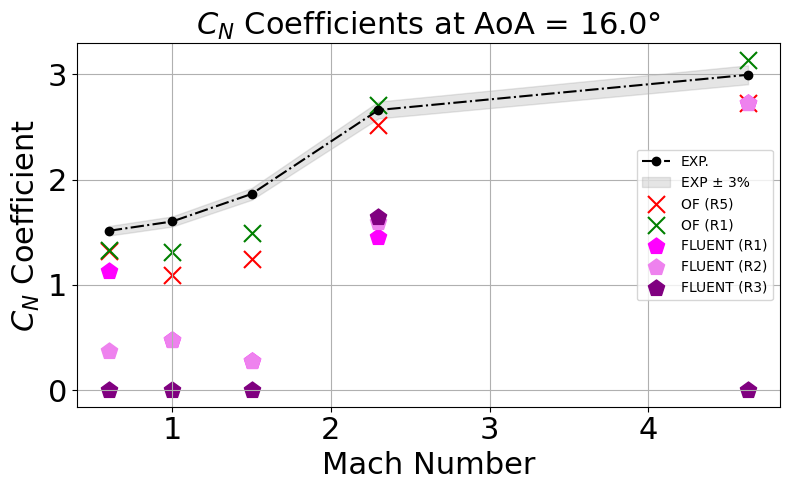

In [7]:
### OpenFOAM results ###
########################
# Data for Mach numbers and corresponding CN values for AoA = 16
OF_data = {
    0.6: [1.324, 1.333],  # Corresponds to R5 and R1
    1.0: [1.090, 1.315],  # Corresponds to R5 and R1
    1.5: [1.244, 1.491],  # Corresponds to R5 and R1
    2.3: [2.522, 2.708],  # Corresponds to R5 and R1
    4.63: [2.723, 3.137]  # Corresponds to R5 and R1
}

# Extracting Mach numbers and corresponding CN values
OF_mach_numbers = list(OF_data.keys())
#CN_values_R5 = [values[0] for values in OF_data.values()]  # Select R5 values
#CN_values_R1 = [values[1] for values in OF_data.values()]  # Select R1 values
CN_values_R5 = np.array([float(values[0]) for values in OF_data.values()])  # Ensure float conversion
CN_values_R1 = np.array([float(values[1]) for values in OF_data.values()])  # Ensure float conversion

# Calculating 3% error margins
error_margin_R5 = CN_values_R5 * 0.03
error_margin_R1 = CN_values_R1 * 0.03

### Fluent results ###
######################
# Data for Mach numbers and corresponding CN values for AoA = 16
FLUENT_data = {
    0.6:  [1.1301, 0.373,  0.000],  # Corresponds to R1, R2, R3, R4, R5
    1.0:  [0.477,  0.477,  0.000],  
    1.5:  [0.2737, 0.2737, 0.000],  
    2.3:  [1.452,  1.6010, 1.6456], 
    4.63: [2.7299, 2.7299, 0.000]  
}

# Extracting Mach numbers and corresponding CA values
FLUENT_mach_numbers = list(FLUENT_data.keys())
CN_values_R1_FLUENT = [values[0] for values in FLUENT_data.values()]  # Select R1 values
CN_values_R2_FLUENT = [values[1] for values in FLUENT_data.values()]  # Select R2 values
CN_values_R3_FLUENT = [values[2] for values in FLUENT_data.values()]  # Select R3 values

# Extract the unique AoA values, skipping NaNs
unique_aoa = data['AoA'].dropna().unique()

# Select a specific AoA value for demonstration (e.g., index 80)
selected_aoa_values = unique_aoa[240:241]

# Iterate over the selected AoA values and plot for each
for aoa_value in selected_aoa_values:
    # Extract the CN values for the specific AoA across all Mach numbers
    cn_values = data[data['AoA'] == aoa_value].iloc[0, 1:]  # Select the row for the AoA and skip the 'AoA' column
    
    # Extract the Mach numbers from column names and convert them to floats
    mach_numbers = [float(re.findall(r"[-+]?\d*\.?\d+", col)[0]) for col in data.columns[1:]]
    cn_values = cn_values.values

    # Sort the Mach numbers and the corresponding C_A values
    sorted_indices = np.argsort(mach_numbers)
    mach_numbers = np.array(mach_numbers)[sorted_indices]
    cn_values = cn_values[sorted_indices]
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(mach_numbers, cn_values, marker='o', linestyle='-.', color='k', label='EXP.')
   
    # Calculating 3% error margins
    error_margin = cn_values * 0.03

    plt.fill_between(mach_numbers, cn_values - error_margin, cn_values + error_margin, color='gray', alpha=0.2, label="EXP ± 3%")

    # Plotting OF results
    plt.scatter(OF_mach_numbers, CN_values_R5, marker='x', s=150, label='OF (R5)', color='red')
    plt.scatter(OF_mach_numbers, CN_values_R1, marker='x', s=150, label='OF (R1)', color='green')

    # Plotting OF results with error bands
    #plt.fill_between(OF_mach_numbers, CN_values_R5 - error_margin_R5, CN_values_R5 + error_margin_R5, color='red', alpha=0.2, label="OF (R5) ± 3%")
    #plt.fill_between(OF_mach_numbers, CN_values_R1 - error_margin_R1, CN_values_R1 + error_margin_R1, color='green', alpha=0.2, label="OF (R1) ± 3%")
    
    # Plotting FLUENT results
    plt.scatter(FLUENT_mach_numbers, CN_values_R1_FLUENT, marker='p', s=150, label='FLUENT (R1)', color='magenta')
    plt.scatter(FLUENT_mach_numbers, CN_values_R2_FLUENT, marker='p', s=150, label='FLUENT (R2)', color='violet')
    plt.scatter(FLUENT_mach_numbers, CN_values_R3_FLUENT, marker='p', s=150, label='FLUENT (R3)', color='purple')
    
    # Increase tick label font size
    plt.tick_params(axis='both', which='major', labelsize=22)  # Major ticks
    plt.tick_params(axis='both', which='minor', labelsize=22)  # Minor ticks
    
    plt.xlabel('Mach Number', fontsize=22)
    plt.ylabel(r'$C_N$ Coefficient', fontsize=22)
    plt.title(f'$C_N$ Coefficients at AoA = {aoa_value}°', fontsize=22)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.savefig("CN_alpha16.png")
    plt.savefig("CN_alpha16.eps")
    plt.savefig("CN_alpha16.pdf")         
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


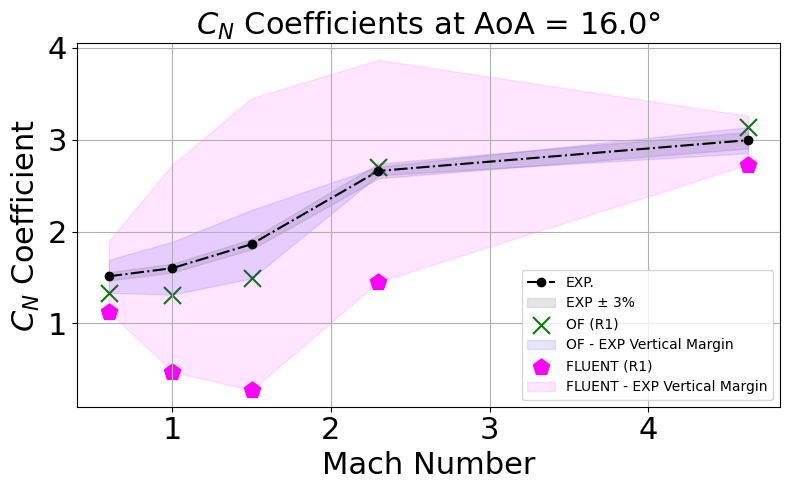

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Existing data preparation steps
OF_mach_numbers = list(OF_data.keys())
CN_values_R5 = np.array([float(values[0]) for values in OF_data.values()]) 
CN_values_R1 = np.array([float(values[1]) for values in OF_data.values()])
FLUENT_mach_numbers = list(FLUENT_data.keys())
CN_values_R1_FLUENT = [values[0] for values in FLUENT_data.values()]

# Selected AoA
selected_aoa_values = unique_aoa[240:241]

# Iterate over AoA values
for aoa_value in selected_aoa_values:
    cn_values = data[data['AoA'] == aoa_value].iloc[0, 1:]
    mach_numbers = [float(re.findall(r"[-+]?\d*\.?\d+", col)[0]) for col in data.columns[1:]]
    cn_values = cn_values.values
    sorted_indices = np.argsort(mach_numbers)
    mach_numbers = np.array(mach_numbers)[sorted_indices]
    cn_values = cn_values[sorted_indices]

    # Plotting setup
    plt.figure(figsize=(8, 5))
    plt.plot(mach_numbers, cn_values, marker='o', linestyle='-.', color='k', label='EXP.')
    
    # Calculate vertical error margins
    OF_vertical_margin = np.abs(cn_values - CN_values_R1)
    FLUENT_vertical_margin = np.abs(cn_values - CN_values_R1_FLUENT)

    # Plotting experimental ±3% error
    error_margin = cn_values * 0.03
    plt.fill_between(mach_numbers, cn_values - error_margin, cn_values + error_margin, color='gray', alpha=0.2, label="EXP ± 3%")
    
    # Plotting OpenFOAM results and error margins
    plt.scatter(OF_mach_numbers, CN_values_R1, marker='x', s=150, label='OF (R1)', color='green')
    plt.fill_between(OF_mach_numbers, cn_values - OF_vertical_margin, cn_values + OF_vertical_margin, color='blue', alpha=0.1, label="OF - EXP Vertical Margin")

    # Plotting Fluent results and error margins
    plt.scatter(FLUENT_mach_numbers, CN_values_R1_FLUENT, marker='p', s=150, label='FLUENT (R1)', color='magenta')
    plt.fill_between(FLUENT_mach_numbers, cn_values - FLUENT_vertical_margin, cn_values + FLUENT_vertical_margin, color='magenta', alpha=0.1, label="FLUENT - EXP Vertical Margin")

    # Axes labels, title, and legend
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.xlabel('Mach Number', fontsize=22)
    plt.ylabel(r'$C_N$ Coefficient', fontsize=22)
    plt.title(f'$C_N$ Coefficients at AoA = {aoa_value}°', fontsize=22)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    
    # Save and show the plot
    plt.savefig("CN_alpha16.png")
    plt.savefig("CN_alpha16.eps")
    plt.savefig("CN_alpha16.pdf")
    plt.show()

In [17]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Existing data preparation steps
# OF_mach_numbers = list(OF_data.keys())
# CN_values_R5 = np.array([float(values[0]) for values in OF_data.values()]) 
# CN_values_R1 = np.array([float(values[1]) for values in OF_data.values()])
# FLUENT_mach_numbers = list(FLUENT_data.keys())
# CN_values_R1_FLUENT = [values[0] for values in FLUENT_data.values()]

# # Selected AoA
# selected_aoa_values = unique_aoa[240:241]

# # Iterate over AoA values
# for aoa_value in selected_aoa_values:
#     cn_values = data[data['AoA'] == aoa_value].iloc[0, 1:]
#     mach_numbers = [float(re.findall(r"[-+]?\d*\.?\d+", col)[0]) for col in data.columns[1:]]
#     cn_values = cn_values.values
#     sorted_indices = np.argsort(mach_numbers)
#     mach_numbers = np.array(mach_numbers)[sorted_indices]
#     cn_values = cn_values[sorted_indices]

#     # Calculate error margins
#     OF_vertical_margin = np.abs(cn_values - CN_values_R1)
#     FLUENT_vertical_margin = np.abs(cn_values - CN_values_R1_FLUENT)

#     # Plotting setup for error margins
#     plt.figure(figsize=(10, 6))
#     width = 0.35  # Width of the bars
#     x = np.arange(len(mach_numbers))  # Label locations

#     # Create bar plots for error margins
#     bars1 = plt.bar(x - width/2, OF_vertical_margin, width, label='OF - EXP Margin', color='green', alpha=0.7)
#     bars2 = plt.bar(x + width/2, FLUENT_vertical_margin, width, label='FLUENT - EXP Margin', color='magenta', alpha=0.7)

#     # Axes labels, title, and ticks
#     plt.xlabel('Mach Number', fontsize=22)
#     plt.ylabel('Vertical Error Margin', fontsize=22)
#     plt.title(f'Error Margins at AoA = {aoa_value}°', fontsize=22)
#     plt.xticks(x, mach_numbers)  # Set the x-ticks to the Mach numbers
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.legend()

#     # Save and show the plot
#     plt.tight_layout()
#     plt.savefig("ErrorMargins_alpha16.png")
#     plt.savefig("ErrorMargins_alpha16.eps")
#     plt.savefig("ErrorMargins_alpha16.pdf")
#     plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


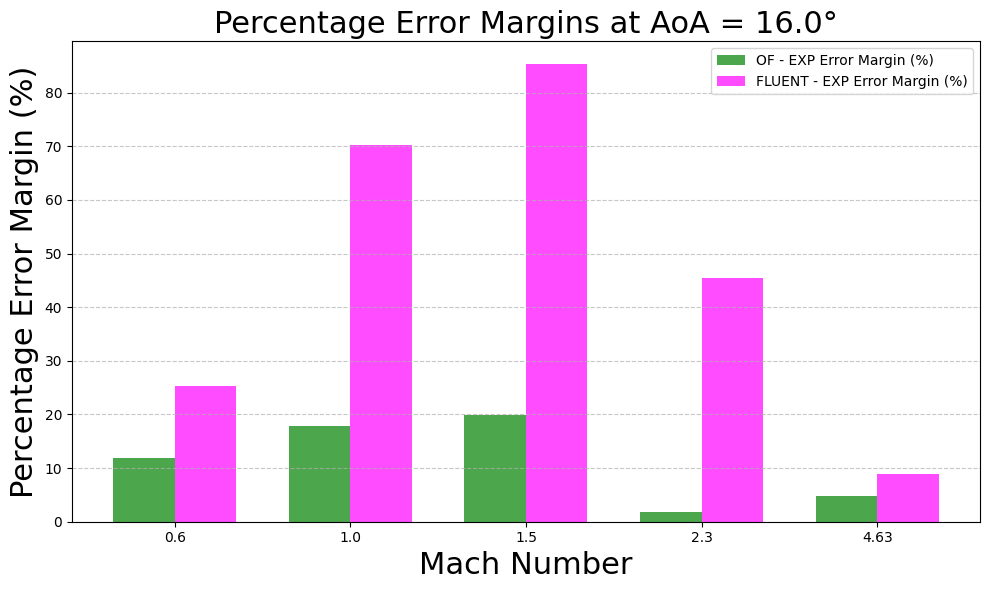

In [19]:
# Existing data preparation steps
OF_mach_numbers = list(OF_data.keys())
CN_values_R5 = np.array([float(values[0]) for values in OF_data.values()]) 
CN_values_R1 = np.array([float(values[1]) for values in OF_data.values()])
FLUENT_mach_numbers = list(FLUENT_data.keys())
CN_values_R1_FLUENT = [values[0] for values in FLUENT_data.values()]

# Selected AoA
selected_aoa_values = unique_aoa[240:241]

# Iterate over AoA values
for aoa_value in selected_aoa_values:
    cn_values = data[data['AoA'] == aoa_value].iloc[0, 1:]
    mach_numbers = [float(re.findall(r"[-+]?\d*\.?\d+", col)[0]) for col in data.columns[1:]]
    cn_values = cn_values.values
    sorted_indices = np.argsort(mach_numbers)
    mach_numbers = np.array(mach_numbers)[sorted_indices]
    cn_values = cn_values[sorted_indices]

    # Calculate percentage error margins
    OF_percentage_error = np.abs(cn_values - CN_values_R1) / np.abs(cn_values) * 100
    FLUENT_percentage_error = np.abs(cn_values - CN_values_R1_FLUENT) / np.abs(cn_values) * 100

    # Plotting setup for percentage error margins
    plt.figure(figsize=(10, 6))
    width = 0.35  # Width of the bars
    x = np.arange(len(mach_numbers))  # Label locations

    # Create bar plots for percentage error margins
    bars1 = plt.bar(x - width/2, OF_percentage_error, width, label='OF - EXP Error Margin (%)', color='green', alpha=0.7)
    bars2 = plt.bar(x + width/2, FLUENT_percentage_error, width, label='FLUENT - EXP Error Margin (%)', color='magenta', alpha=0.7)

    # Axes labels, title, and ticks
    plt.xlabel('Mach Number', fontsize=22)
    plt.ylabel('Percentage Error Margin (%)', fontsize=22)
    plt.title(f'Percentage Error Margins at AoA = {aoa_value}°', fontsize=22)
    plt.xticks(x, mach_numbers)  # Set the x-ticks to the Mach numbers
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()

    # Save and show the plot
    plt.tight_layout()
    plt.savefig("PercentageErrorMargins_alpha16.png")
    plt.savefig("PercentageErrorMargins_alpha16.eps")
    plt.savefig("PercentageErrorMargins_alpha16.pdf")
    plt.show()

### $C_N$ coefficient for all $\alpha$ value as function of Mach number.

#### Absent values are skipped and reported.

In [8]:
# # Extract the unique AoA values, skipping NaNs
# unique_aoa = data['AoA'].dropna().unique()

# # Select AoA values starting from the first one and then every 10th value
# selected_aoa_values = unique_aoa[::10]  # Slices every 10th element from the array

# # Iterate over the selected AoA values and plot for each
# for aoa_value in selected_aoa_values:
#     # Extract the CN values for the specific AoA across all Mach numbers
#     cn_values = data[data['AoA'] == aoa_value].iloc[0, 1:]  # Select the row for the AoA and skip the 'AoA' column
    
#     # Check if there are any valid CA values (not all NaN)
#     if cn_values.notna().any():
#         # Get the Mach numbers from column names
#         mach_numbers = [col.split('_')[0] for col in data.columns[1:]]
        
#         # Plot
#         plt.figure(figsize=(8, 5))
#         plt.plot(mach_numbers, cn_values, marker='o', linestyle='-', color='b')
#         plt.xlabel('Mach Number')
#         plt.ylabel('C_N Coefficient')
#         plt.title(f'C_N Coefficients at AoA = {aoa_value}°')
#         plt.grid(True)
#         plt.tight_layout()
#         plt.show()
#     else:
#         print(f"No valid C_N values for AoA = {aoa_value}°; skipping this plot.")

In [9]:
# Extract the unique AoA values, skipping NaNs
unique_aoa = data['AoA'].dropna().unique()

# Select AoA values starting from the first one and then every 10th value
selected_aoa_values = unique_aoa[::10]  # Slices every 10th element from the array

# Iterate over the selected AoA values and plot for each
for aoa_value in selected_aoa_values:
    # Extract the CN values for the specific AoA across all Mach numbers
    cn_values = data[data['AoA'] == aoa_value].iloc[0, 1:]  # Select the row for the AoA and skip the 'AoA' column
    
    # Check if there are any valid CA values (not all NaN)
    if cn_values.notna().any():
        # Extract only the numeric part of the Mach number from column names using regex
        mach_numbers = [float(re.findall(r"[-+]?\d*\.?\d+", col)[0]) for col in data.columns[1:]]
        cn_values = cn_values.values
        
        # Sort the Mach numbers and C_N values together
        sorted_indices = np.argsort(mach_numbers)
        mach_numbers = np.array(mach_numbers)[sorted_indices]
        cn_values = cn_values[sorted_indices]
        
        # Plot
        #plt.figure(figsize=(8, 5))
        #plt.plot(mach_numbers, cn_values, marker='o', linestyle='-', color='b')
        #plt.xlabel('Mach Number')
        #plt.ylabel(r'$C_N$ Coefficient')  # Using LaTeX for C_N
        #plt.title(r'$C_N$ Coefficients at AoA = ' + f'{aoa_value}°')
        #plt.grid(True)
        #plt.tight_layout()
        #plt.show()
    else:
        print(f"No valid C_N values for AoA = {aoa_value}°; skipping this plot.")

No valid C_N values for AoA = -8.0°; skipping this plot.
No valid C_N values for AoA = -7.0°; skipping this plot.
No valid C_N values for AoA = -6.0°; skipping this plot.
No valid C_N values for AoA = -5.0°; skipping this plot.
No valid C_N values for AoA = 22.0°; skipping this plot.
No valid C_N values for AoA = 23.0°; skipping this plot.
No valid C_N values for AoA = 24.0°; skipping this plot.
